Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 89s 119ms/step - accuracy: 0.5638 - loss: 0.6941 - val_accuracy: 0.6184 - val_loss: 0.6553
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 78s 119ms/step - accuracy: 0.6062 - loss: 0.6592 - val_accuracy: 0.6296 - val_loss: 0.6505
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 70s 119ms/step - accuracy: 0.6172 - loss: 0.6556 - val_accuracy: 0.6348 - val_loss: 0.6423
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 61s 104ms/step - accuracy: 0.6257 - loss: 0.6492 - val_accuracy: 0.6382 - val_loss: 0.6399
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.6294 - loss: 0.6457 - val_accuracy: 0.6434 - val_loss: 0.6342
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 91s 119ms/step - accuracy: 0.6330 - loss: 0.6410 - val_accuracy: 0.6427 - val_loss: 0.6366
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.6279 - loss: 0.6425 - val_accuracy: 0.6586 - val_loss: 0.6319
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 90s 119ms/step - accuracy: 0.6353 - loss: 0

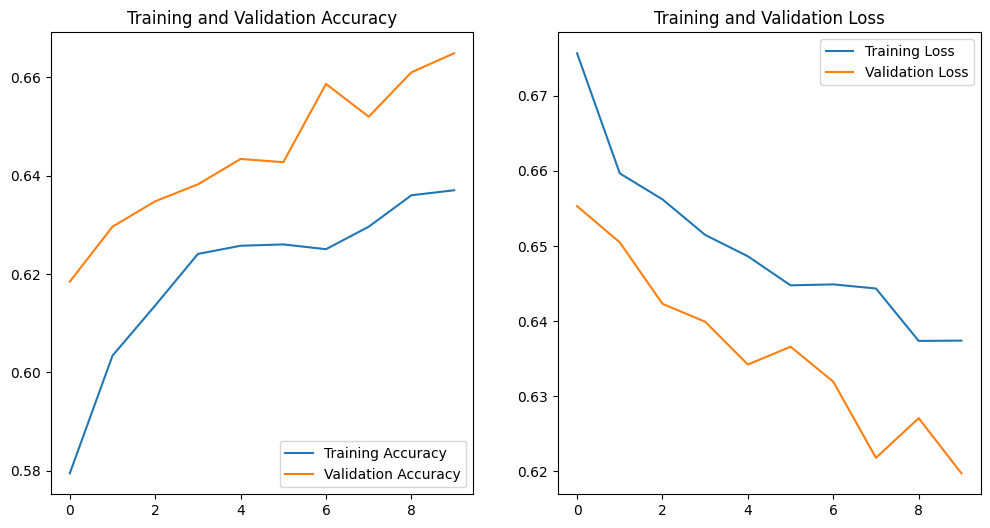

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 260s 358ms/step - accuracy: 0.7420 - loss: 3.9283 - val_accuracy: 0.6152 - val_loss: 0.9008
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 219s 319ms/step - accuracy: 0.9725 - loss: 0.0833 - val_accuracy: 0.9826 - val_loss: 0.0704
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 177s 304ms/step - accuracy: 0.9855 - loss: 0.0419 - val_accuracy: 0.9852 - val_loss: 0.0701
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 185s 318ms/step - accuracy: 0.9917 - loss: 0.0221 - val_accuracy: 0.9877 - val_loss: 0.0736
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 194s 304ms/step - accuracy: 0.9946 - loss: 0.0145 - val_accuracy: 0.9869 - val_loss: 0.0642
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9870 - loss: 0.0706
Test Accuracy: 0.9868873357772827


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize images to 224x224 for ResNet50
    image = image / 255.0  # Normalize the images to [0, 1]
    return image, label

batch_size = 32
ds_train = ds_train.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
# Load the pre-trained ResNet50 model (without the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Global average pooling
x = layers.Dense(128, activation='relu')(x)  # Custom fully connected layer
x = layers.Dropout(0.5)(x)  # Dropout for regularization
outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification output (sigmoid)

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Check the model architecture
model.summary()
# Train the model
history = model.fit(ds_train, epochs=10, validation_data=ds_test)
# Plot accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Use a smaller learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(ds_train, epochs=5, validation_data=ds_test)
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc}")


In [ ]:
model.save('fine_tuned_res_net_50_for_binary_classification.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


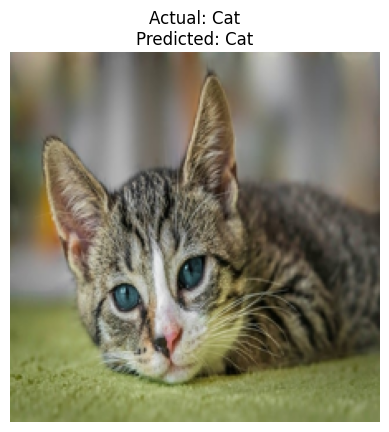

In [ ]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from io import BytesIO

# Load your pre-trained model
model = tf.keras.models.load_model('/content/fine_tuned_res_net_50_for_binary_classification.keras')

# Define the class labels
class_names = ['Cat', 'Dog']  # Adjust based on your model's label encoding

def predict_image_from_url(image_url, actual_class):
    # Fetch the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Preprocess the image
    img = img.resize((224, 224))  # Resize to match model input size (adjust if needed)
    img_array = np.array(img) / 255.0  # Scale pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    # Display the image and the results
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.show()

# Example usage
image_url = 'https://cdn.pixabay.com/photo/2024/02/28/07/42/european-shorthair-8601492_640.jpg'  # Replace with your image URL
actual_class = 'Cat'  # Replace with the actual class
predict_image_from_url(image_url, actual_class)
